Plot samples of 2D Wishart distribution

cf. Kevin Murphy MLaPP Sec. 4.5.2

In [28]:
import math
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Ellipse
%matplotlib inline
matplotlib.style.use('ggplot')

In [6]:
S = np.array([[3.1653, -0.0262], [-0.0262, 0.6477]])
wish = scipy.stats.wishart(scale=S, df=3)

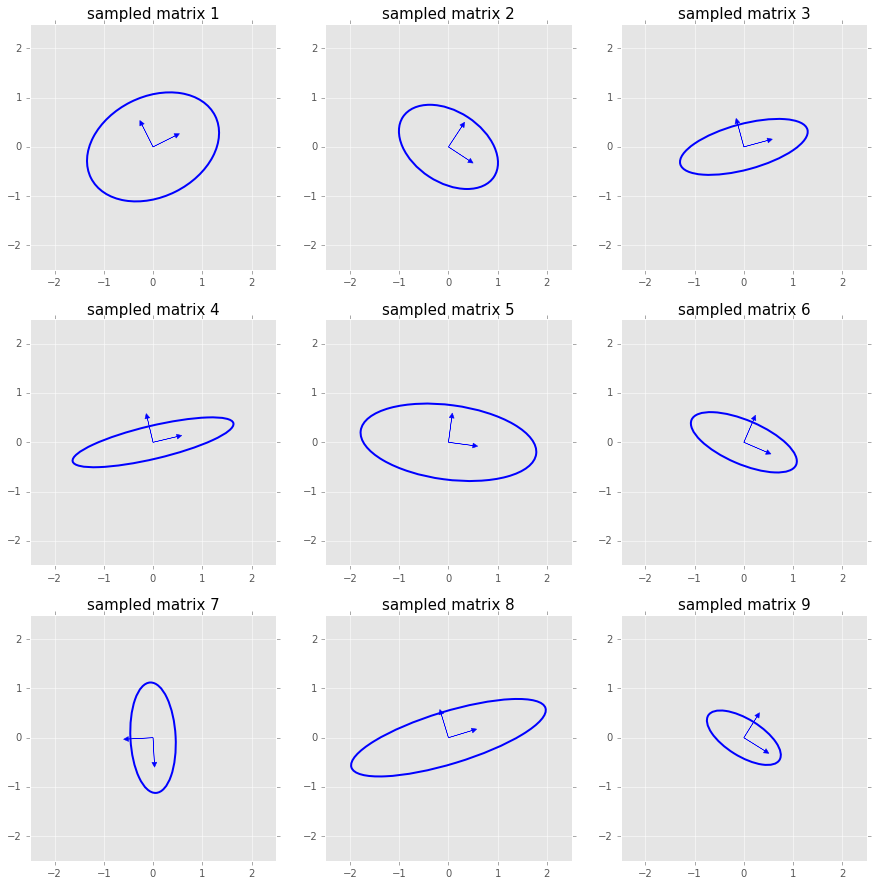

In [49]:
FONTSIZE = 15
plt.close('all')
fig = plt.figure(figsize=(15, 15))
gs = matplotlib.gridspec.GridSpec(3, 3) 

counter = 1
for ivertical in range(3):
    for ihorizontal in range(3):
        ax = plt.subplot(gs[ivertical, ihorizontal])
    
        sample = wish.rvs()
        eig_vals, eig_vecs = np.linalg.eig(sample)    
    
        ellipse = Ellipse(xy=(0, 0), 
                          width=np.sqrt(eig_vals[0]), height=np.sqrt(eig_vals[1]), 
                          angle=math.degrees(math.atan(eig_vecs[1,0]/eig_vecs[0,0])),
                          edgecolor='b', fc='None', lw=2)
        ax.add_patch(ellipse)
        ax.arrow(0, 0, 0.5*eig_vecs[0,0], 0.5*eig_vecs[1,0], head_width=0.1, head_length=0.1, fc='b', ec='b')
        ax.arrow(0, 0, 0.5*eig_vecs[0,1], 0.5*eig_vecs[1,1], head_width=0.1, head_length=0.1, fc='b', ec='b')
        
        ax.set_xlim(-2.5, 2.5)
        ax.set_ylim(-2.5, 2.5)

        ax.set_title('sampled matrix {0:}'.format(counter), fontsize=FONTSIZE)   

        counter += 1
        